In [1]:
import pandas as pd

import fastparquet

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
def full_path(path: str) -> str:
    path_to_project = r'C:\Users\Arseniy\Documents\Skillbox\diploma_ML/'
    return path_to_project + path 

# Loading Partition 0

<i>Загрузим и проанализуируем для начала один из parquet-файлов

In [6]:
df = pd.read_parquet(full_path('data/train_data/train_data_0.pq'))
df

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,4,1,9,14,8,10,11,8,4,2,0,2,4,6,16,5,4,8,1,1,1,1,1,11,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,3,3,3,3,3,4,3,3,3,4,1,2,3,1,0,1
1974720,249998,5,7,9,4,8,1,11,19,1,4,0,2,7,6,16,5,4,8,1,1,1,1,1,7,2,17,0,1,1,0,0,0,0,0,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,4,1,1,1
1974721,249999,1,9,0,10,8,10,11,16,2,3,0,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,3,1,0,1
1974722,249999,2,9,16,10,13,10,4,12,2,3,0,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,3,1,0,0


Merege Target

In [7]:
target = pd.read_csv(full_path('data/train_target.csv'))
df2 = df.join(target.flag, how='left')
df2.rename(columns={'flag': 'target'}, inplace=True)
df2

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,target
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,1,1,0
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0,0
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,4,1,9,14,8,10,11,8,4,2,0,2,4,6,16,5,4,8,1,1,1,1,1,11,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,3,3,3,3,3,4,3,3,3,4,1,2,3,1,0,1,0
1974720,249998,5,7,9,4,8,1,11,19,1,4,0,2,7,6,16,5,4,8,1,1,1,1,1,7,2,17,0,1,1,0,0,0,0,0,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,4,1,1,1,1
1974721,249999,1,9,0,10,8,10,11,16,2,3,0,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,3,1,0,1,0
1974722,249999,2,9,16,10,13,10,4,12,2,3,0,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,2,3,1,0,0,1


## Data understading and feature selection

<i>Попробуем определить значимость фичей, используя оценку Фишера

<i>P.S. В итоге, после нескольких циклов моделирования я понял, что максимальную точность можно получить, если использовать все фичи

### Fisher's score

In [8]:
from skfeature.function.similarity_based import fisher_score

In [11]:
samp = df2.sample(10000)

In [12]:
rank = fisher_score.fisher_score(samp.drop(columns='target').to_numpy(), samp['target'].to_numpy())
feat_imp = pd.Series(rank, samp.drop(columns='target').columns)

In [17]:
feat_imp.sort_values(ascending=True).head(30)

enc_paym_24                       0
is_zero_loans530                  1
is_zero_over2limit                2
enc_paym_17                       3
enc_loans_account_holder_type     4
enc_paym_23                       5
pre_loans_outstanding             6
pre_since_confirmed               7
pre_loans_next_pay_summ           8
pre_fterm                         9
id                               10
pre_since_opened                 11
rn                               12
pre_pterm                        13
pre_till_fclose                  14
pre_loans_credit_limit           15
pre_loans_credit_cost_rate       16
pre_loans5                       17
pre_loans530                     18
pre_loans_total_overdue          19
pre_util                         20
is_zero_loans3060                21
pre_till_pclose                  22
is_zero_loans6090                23
pre_loans3060                    24
pre_over2limit                   25
enc_paym_7                       26
enc_paym_8                  

### Cramer's correlation

<i>Вычислив матрицу корреляций Крамера, посмотрим, нет ли линейно зависимых фичей

In [147]:
import scipy.stats as ss
import numpy as np

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.to_numpy().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    rcorr += 0.000001 if rcorr == 1.0 else 0
    kcorr += 0.000001 if kcorr == 1.0 else 0
    return np.sqrt(phi2corr / min( kcorr-1, rcorr-1 ))

In [149]:
from itertools import product

for colX, colY in product(df.drop(columns=['id', 'rn']).columns, repeat=2):
    confusion_matrix = pd.crosstab(df[colX], df[colY])
    cramer_matrix.loc[colX, colY] = cramers_corrected_stat(confusion_matrix)


In [152]:
corr_cols = [k for k, v in cramer_matrix[(cramer_matrix <= 0.999) & (cramer_matrix > 0.7)].notna().any().items() if v]

In [153]:
cramer_matrix[cramer_matrix > 0.7].loc[corr_cols, corr_cols]

,pre_pterm,pre_fterm,pre_loans_credit_limit,pre_util,pre_over2limit,pre_maxover2limit,enc_loans_credit_status,pre_till_pclose,pre_till_fclose,pre_loans_outstanding,pre_loans_max_overdue_sum,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,fclose_flag
pre_pterm,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942130,NaN
pre_fterm,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.979666
pre_loans_credit_limit,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.704909,NaN,NaN,NaN
pre_util,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970562,0.940954,NaN,NaN,NaN
pre_over2limit,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.971712,NaN,NaN,NaN
pre_maxover2limit,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.955972,0.785576,NaN,NaN
enc_loans_credit_status,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.746591,NaN,NaN,NaN,NaN
pre_till_pclose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.870175,NaN
pre_till_fclose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.704827,NaN,NaN,NaN,0.889790
pre_loans_outstanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.780517,NaN,NaN,NaN,NaN


<i>Есть корреляции между некоторомы фичами, но, как я уже писал, я остановился на всех фичах, так как похоже, что корреляции не имеют влияние на выбранные в итоге типы моделей


### enc_paym_N

<i>рассмотрим значения enc_paym_*

In [14]:
enc_paym =[x for x in df2.columns if x.startswith('enc_paym')]

In [102]:
for col in enc_paym:
    temp = df2[col].value_counts()
    print(temp, '\n')

enc_paym_0
0    1791770
3      88319
1      87480
2       7155
Name: count, dtype: int64 

enc_paym_1
0    1635644
3     205080
1     124300
2       9700
Name: count, dtype: int64 

enc_paym_2
0    1556292
3     299304
1     110228
2       8900
Name: count, dtype: int64 

enc_paym_3
0    1474594
3     386940
1     104846
2       8344
Name: count, dtype: int64 

enc_paym_4
0    1383266
3     486048
1      97863
2       7547
Name: count, dtype: int64 

enc_paym_5
0    1300408
3     576932
1      90451
2       6933
Name: count, dtype: int64 

enc_paym_6
0    1181675
3     704689
1      82467
2       5893
Name: count, dtype: int64 

enc_paym_7
0    1093372
3     799529
1      76460
2       5363
Name: count, dtype: int64 

enc_paym_8
0    1021305
3     879207
1      69501
2       4711
Name: count, dtype: int64 

enc_paym_9
3    953701
0    953024
1     63775
2      4224
Name: count, dtype: int64 

enc_paym_10
3    1050342
0     863319
1      57334
2       3729
Name: count, dtype: int64 

en

In [15]:
temp = pd.DataFrame(index=enc_paym, columns=range(5))
for col in enc_paym:
    temp.loc[col] = df2[col].value_counts()
    
temp

,0,1,2,3,4
enc_paym_0,1791770.0,87480.0,7155.0,88319.0,NaN
enc_paym_1,1635644.0,124300.0,9700.0,205080.0,NaN
enc_paym_2,1556292.0,110228.0,8900.0,299304.0,NaN
enc_paym_3,1474594.0,104846.0,8344.0,386940.0,NaN
enc_paym_4,1383266.0,97863.0,7547.0,486048.0,NaN
enc_paym_5,1300408.0,90451.0,6933.0,576932.0,NaN
enc_paym_6,1181675.0,82467.0,5893.0,704689.0,NaN
enc_paym_7,1093372.0,76460.0,5363.0,799529.0,NaN
enc_paym_8,1021305.0,69501.0,4711.0,879207.0,NaN
enc_paym_9,953024.0,63775.0,4224.0,953701.0,NaN


<i>Видно, что значения для месяцев 11, 20, 24 сдвинуты на единицу. Для генераии фич из этих колонок нужно, чтобы они были закодированы одинаково

In [16]:
for col in ['enc_paym_11', 'enc_paym_20', 'enc_paym_24']:
    df2[col] = df2[col].apply(lambda x: x - 1)

In [17]:
df2[enc_paym].sample(n=5)

,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24
1143358,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
850596,0,3,3,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1222056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3
1432952,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1718471,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [18]:
temp = pd.DataFrame(index=enc_paym, columns=range(5))
for col in enc_paym:
    temp.loc[col] = df2[col].value_counts()

''

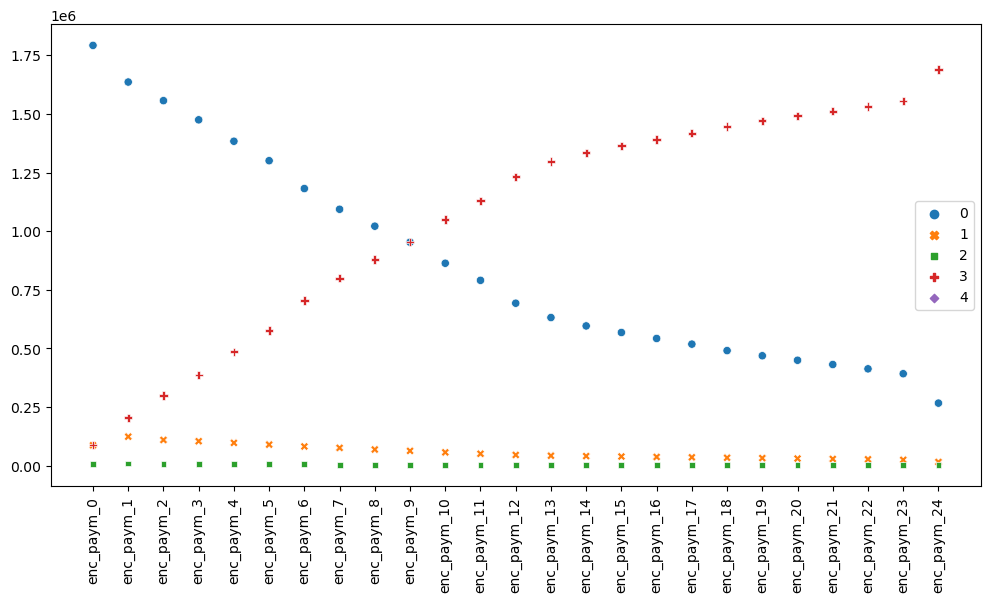

In [19]:
plt.figure(figsize=(12,6))
plt.tick_params(axis='x', labelrotation=90)
sns.scatterplot(temp)
;

<i>Теперь значения корректны, попробуем определить, что значат коды 0, 1, 2, 3

In [21]:
col_flags = ['is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90']

In [26]:
df2[(df2[col_flags] == 0).any(axis=1)]

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,target
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,1,0,0,0
10,1,1,8,7,12,15,9,1,1,2,4,0,1,4,6,16,5,4,8,1,1,0,0,0,2,10,8,0,0,0,0,3,3,3,3,3,3,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,1,3,4,1,0,0,0
11,1,2,8,7,13,2,9,1,6,2,3,0,1,4,6,16,5,4,8,1,1,0,0,0,0,0,10,0,0,0,0,3,3,3,3,3,3,2,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0
14,1,5,14,4,7,6,9,1,3,2,3,0,2,4,6,16,5,4,8,1,0,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,4,1,0,0,0
17,1,8,10,14,2,14,13,5,14,0,3,0,2,4,6,16,5,4,8,1,0,1,1,0,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974702,249996,17,2,9,17,15,8,2,0,0,3,0,1,3,6,16,5,4,8,1,0,1,1,1,16,2,17,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0
1974709,249997,1,8,4,17,16,9,1,1,2,3,0,2,2,6,16,5,4,8,1,0,1,1,1,16,2,17,1,1,1,1,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,4,2,2,0,0,0
1974713,249997,5,14,6,17,14,3,5,2,5,3,0,1,8,6,16,5,4,8,1,0,1,1,1,16,2,17,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,3,4,1,0,0,0
1974716,249998,1,15,8,12,10,6,13,19,2,3,0,1,4,6,16,5,4,8,1,0,1,0,0,16,18,12,1,0,0,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,4,4,1,0,0,0


In [29]:
df2[(df2[enc_paym] == 1).any(axis=1) & (df2[col_flags] == 0).any(axis=1)].shape

(457981, 62)

In [30]:
df2[(df2[enc_paym] == 2).any(axis=1) & (df2[col_flags] == 0).any(axis=1)].shape

(70047, 62)

Делаем следующий вывод:
* 0 - всё нормально
* 3 - кредит закрыт или ещё не открыт
* 1 - просрочка
* 2 - просрочка

### Max loan months

<i>Ведём фичу max loan months, показывающую максимальные период просрочки платежа (коды 1, 2) в месяцах

In [31]:
def max_loan_months(s: pd.Series) -> int:
    chunks = [[]]
    for val in s.values:
        if val not in (1, 2):
            chunks.append([])
        else:
            chunks[-1].append(val)
    return max(map(len, chunks))

In [32]:
df2['max_loan_months'] = df2[enc_paym].apply(max_loan_months, axis=1)
df2

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,target,max_loan_months
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,3,4,1,0,0,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,1,1,1,0,0
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,1,0,0,0,1
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,4,1,9,14,8,10,11,8,4,2,0,2,4,6,16,5,4,8,1,1,1,1,1,11,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,1,2,3,1,0,1,0,0
1974720,249998,5,7,9,4,8,1,11,19,1,4,0,2,7,6,16,5,4,8,1,1,1,1,1,7,2,17,0,1,1,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,2,4,1,1,1,1,0
1974721,249999,1,9,0,10,8,10,11,16,2,3,0,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,2,3,1,0,1,0,0
1974722,249999,2,9,16,10,13,10,4,12,2,3,0,2,7,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,2,3,1,0,0,1,0


In [33]:
df2.max_loan_months.value_counts()

max_loan_months
0     1509293
1      253840
2      101283
3       41590
4       23573
5       14095
6        9267
7        6093
8        4144
9        3009
10       2222
11       1633
12       1210
13        740
14        505
15        447
16        358
17        279
18        239
19        187
20        133
25        127
21        127
24        122
23        108
22        100
Name: count, dtype: int64

### Frac loan months

<i>Введём фичу Frac loan months, показывающую долю месяцев с просрочками к кол-ву всех платёжных месяцев

In [36]:
def frac_loan_months(df: pd.DataFrame) -> pd.DataFrame:
    total_pay_months = (df != 3).sum(axis=1)
    total_pay_months = total_pay_months.apply(lambda x: 24 if x == 0 else x)
    return ((df == 1).sum(axis=1) + (df == 2).sum(axis=1)) / total_pay_months

In [37]:
df2['frac_loan_months'] = frac_loan_months(df2[enc_paym])
df2.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,target,max_loan_months,frac_loan_months
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0,0,0.000000
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,3,4,1,0,0,0,0,0.000000
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,1,1,1,0,0,0.000000
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,1,0,0,0,1,0.083333
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0,0,0.000000


### Credit History length

<i>Введём для каждого кредита Credit history length, покзывающую кол-во месяцев, которое уже выплачивается кредит

In [38]:
def credit_history_length(s: pd.Series) -> int:
    for col in reversed(enc_paym):
        if s[col] != 3: 
            return int(col.lstrip('enc_paym_'))
    return 0

credit_history_length(df2.loc[4, enc_paym])

6

In [39]:
df2.loc[4, enc_paym]

enc_paym_0     0.0
enc_paym_1     0.0
enc_paym_2     0.0
enc_paym_3     0.0
enc_paym_4     0.0
enc_paym_5     0.0
enc_paym_6     0.0
enc_paym_7     3.0
enc_paym_8     3.0
enc_paym_9     3.0
enc_paym_10    3.0
enc_paym_11    3.0
enc_paym_12    3.0
enc_paym_13    3.0
enc_paym_14    3.0
enc_paym_15    3.0
enc_paym_16    3.0
enc_paym_17    3.0
enc_paym_18    3.0
enc_paym_19    3.0
enc_paym_20    3.0
enc_paym_21    3.0
enc_paym_22    3.0
enc_paym_23    3.0
enc_paym_24    3.0
Name: 4, dtype: float64

In [40]:
df2['credit_history_length'] = df2[enc_paym].apply(credit_history_length, axis=1)
df2.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,target,max_loan_months,frac_loan_months,credit_history_length
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0,0,0.000000,1
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,3,4,1,0,0,0,0,0.000000,23
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,1,1,1,0,0,0.000000,23
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,1,0,0,0,1,0.083333,11
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,4,1,0,0,0,0,0.000000,6


In [41]:
df = df2.copy()

### OHE и агрегация

In [42]:
for col in df.columns:
    print(f"{col}\n{df[col].value_counts()}\n")

id
id
62963     51
77107     46
72660     44
4951      43
185462    43
          ..
220126     1
97643      1
220124     1
97668      1
125000     1
Name: count, Length: 250000, dtype: int64

rn
rn
1     250000
2     229328
3     207951
4     186175
5     165023
6     145245
7     126275
8     108898
9      93532
10     79791
11     67690
12     57149
13     48190
14     40472
15     34053
16     28294
17     23211
18     18855
19     15031
20     11934
21      9309
22      7203
23      5495
24      4127
25      3102
26      2290
27      1696
28      1254
29       910
30       668
31       489
32       358
33       248
34       162
35        97
36        70
37        49
38        27
39        20
40        16
41        10
42         8
43         7
44         3
45         2
46         2
47         1
48         1
49         1
50         1
51         1
Name: count, dtype: int64

pre_since_opened
pre_since_opened
18    159072
6     154230
13    141904
4     138266
8     133032
0     111331


In [49]:
flags = [
    'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 
    'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'pclose_flag', 'fclose_flag', 
]
cat = [x for x in df.columns if x not in ['id', 'rn'] + flags + num + ['pre_loans6090', 'pre_over2limit', 'enc_loans_account_cur']]
num = ['rn', 'credit_history_length', 'max_loan_months', 'frac_loan_months']

cols = ['id'] + cat + num + flags
enc_paym = [x for x in df.columns if x.startswith('enc_paym')]

In [50]:
ohe = OneHotEncoder(sparse_output=False, dtype='int8')

In [51]:
df2 = df[cols].drop(columns=cat).join(
    pd.DataFrame(
        ohe.fit_transform(df[cat]),
        index=df.index,
        columns=ohe.get_feature_names_out()
    )
)
df2

,id,rn,credit_history_length,max_loan_months,frac_loan_months,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,fclose_flag,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,pre_since_opened_10,pre_since_opened_11,pre_since_opened_12,pre_since_opened_13,pre_since_opened_14,pre_since_opened_15,pre_since_opened_16,pre_since_opened_17,pre_since_opened_18,pre_since_opened_19,pre_since_confirmed_0,pre_since_confirmed_1,pre_since_confirmed_2,pre_since_confirmed_3,pre_since_confirmed_4,pre_since_confirmed_5,pre_since_confirmed_6,pre_since_confirmed_7,pre_since_confirmed_8,pre_since_confirmed_9,pre_since_confirmed_10,pre_since_confirmed_11,pre_since_confirmed_12,pre_since_confirmed_13,pre_since_confirmed_14,pre_since_confirmed_15,pre_since_confirmed_16,pre_since_confirmed_17,pre_pterm_0,pre_pterm_1,pre_pterm_2,pre_pterm_3,pre_pterm_4,pre_pterm_5,pre_pterm_6,pre_pterm_7,pre_pterm_8,pre_pterm_9,pre_pterm_10,pre_pterm_11,pre_pterm_12,pre_pterm_13,pre_pterm_14,pre_pterm_15,pre_pterm_16,pre_pterm_17,pre_fterm_0,pre_fterm_1,pre_fterm_2,pre_fterm_3,pre_fterm_4,pre_fterm_5,pre_fterm_6,pre_fterm_7,pre_fterm_8,pre_fterm_9,pre_fterm_10,pre_fterm_11,pre_fterm_12,pre_fterm_13,pre_fterm_14,pre_fterm_15,pre_fterm_16,pre_till_pclose_0,pre_till_pclose_1,pre_till_pclose_2,pre_till_pclose_3,pre_till_pclose_4,pre_till_pclose_5,pre_till_pclose_6,pre_till_pclose_7,pre_till_pclose_8,pre_till_pclose_9,pre_till_pclose_10,pre_till_pclose_11,pre_till_pclose_12,pre_till_pclose_13,pre_till_pclose_14,pre_till_pclose_15,pre_till_pclose_16,pre_till_fclose_0,pre_till_fclose_1,pre_till_fclose_2,pre_till_fclose_3,pre_till_fclose_4,pre_till_fclose_5,pre_till_fclose_6,pre_till_fclose_7,pre_till_fclose_8,pre_till_fclose_9,pre_till_fclose_10,pre_till_fclose_11,pre_till_fclose_12,pre_till_fclose_13,pre_till_fclose_14,pre_till_fclose_15,pre_loans_credit_limit_0,pre_loans_credit_limit_1,pre_loans_credit_limit_2,pre_loans_credit_limit_3,pre_loans_credit_limit_4,pre_loans_credit_limit_5,pre_loans_credit_limit_6,pre_loans_credit_limit_7,pre_loans_credit_limit_8,pre_loans_credit_limit_9,pre_loans_credit_limit_10,pre_loans_credit_limit_11,pre_loans_credit_limit_12,pre_loans_credit_limit_13,pre_loans_credit_limit_14,pre_loans_credit_limit_15,pre_loans_credit_limit_16,pre_loans_credit_limit_17,pre_loans_credit_limit_18,pre_loans_credit_limit_19,pre_loans_next_pay_summ_0,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,pre_loans_next_pay_summ_5,pre_loans_next_pay_summ_6,pre_loans_outstanding_1,pre_loans_outstanding_2,pre_loans_outstanding_3,pre_loans_outstanding_4,pre_loans_outstanding_5,pre_loans_total_overdue_0,pre_loans_max_overdue_sum_1,pre_loans_max_overdue_sum_2,pre_loans_max_overdue_sum_3,pre_loans_credit_cost_rate_0,pre_loans_credit_cost_rate_1,pre_loans_credit_cost_rate_2,pre_loans_credit_cost_rate_3,pre_loans_credit_cost_rate_4,pre_loans_credit_cost_rate_5,pre_loans_credit_cost_rate_6,pre_loans_credit_cost_rate_7,pre_loans_credit_cost_rate_8,pre_loans_credit_cost_rate_9,pre_loans_credit_cost_rate_10,pre_loans_credit_cost_rate_11,pre_loans_credit_cost_rate_12,pre_loans_credit_cost_rate_13,pre_loans5_0,pre_loans5_2,pre_loans5_3,pre_loans5_5,pre_loans5_6,pre_loans5_7,pre_loans5_13,pre_loans5_16,pre_loans530_0,pre_loans530_1,pre_loans530_2,pre_loans530_3,pre_loans530_4,pre_loans530_6,pre_loans530_7,pre_loans530_10,pre_loans530_11,pre_loans530_12,pre_loans530_13,pre_loans530_14,pre_loans530_15,pre_loans530_16,pre_loans530_18,pre_loans3060_2,pre_loans3060_5,pre_loans3060_7,pre_loans3060_8,pre_loans3060_9,pre_loans90_8,pre_loans90_13,pre_loans90_14,pre_loans90_19,pre_util_0,pre_util_1,pre_util_2,pre_util_3,pre_util_4,pre_util_5,pre_util_6,pre_util_7,pre_util_8,pre_util_9,pre_util_10,pre_util

In [52]:
enc = set(df2.columns) - set(num + flags + ['rn', 'id'])

<i>Агрегируем все закодированные фичи суммированием для каждого id

<i>Флаги также агрегируем суммированием

<i>Для числовых фичей возьмём максимальные значения

In [54]:
func_dict = dict.fromkeys(enc, 'sum')
func_dict.update(dict.fromkeys(flags, 'sum'))
func_dict.update(dict.fromkeys(num, 'max'))

In [55]:
df_agg = df2.groupby('id').agg(func_dict)
df_agg

,pre_since_confirmed_0,pre_till_pclose_3,enc_paym_7_0,enc_paym_6_2,pre_loans90_19,pre_loans_credit_limit_17,enc_loans_credit_status_6,enc_paym_14_0,enc_paym_20_1,pre_loans_max_overdue_sum_2,enc_paym_6_0,enc_paym_11_3,pre_pterm_15,pre_since_confirmed_3,pre_loans530_12,pre_util_15,pre_maxover2limit_18,enc_paym_23_3,pre_util_14,enc_paym_9_0,pre_till_fclose_1,pre_loans530_13,enc_loans_account_holder_type_4,enc_loans_credit_status_3,pre_util_9,pre_loans5_13,pre_pterm_7,enc_paym_23_0,enc_paym_4_1,enc_paym_15_3,enc_loans_account_holder_type_6,enc_paym_15_2,pre_util_4,pre_fterm_3,enc_paym_23_1,pre_util_16,enc_paym_14_3,enc_paym_12_1,pre_till_pclose_10,pre_till_fclose_9,enc_paym_5_3,pre_util_8,pre_loans3060_5,pre_loans5_3,enc_paym_16_1,pre_maxover2limit_12,enc_paym_10_0,pre_since_opened_2,pre_till_pclose_6,pre_pterm_3,pre_loans_credit_cost_rate_2,enc_paym_18_3,pre_maxover2limit_17,enc_paym_3_3,enc_loans_credit_type_4,enc_loans_account_holder_type_1,pre_maxover2limit_2,enc_paym_8_0,enc_paym_8_2,pre_util_10,pre_till_fclose_6,pre_fterm_7,enc_paym_3_2,pre_till_pclose_16,pre_util_12,pre_loans_credit_limit_8,enc_paym_0_3,enc_paym_3_1,pre_pterm_0,pre_util_6,pre_since_opened_5,pre_till_fclose_11,pre_loans_next_pay_summ_0,pre_loans530_3,enc_paym_11_0,pre_till_pclose_7,pre_fterm_15,pre_loans530_11,pre_loans_credit_limit_5,pre_since_opened_18,pre_fterm_5,enc_paym_19_3,pre_since_confirmed_6,pre_loans_next_pay_summ_1,pre_loans_credit_limit_18,pre_fterm_14,enc_paym_2_0,enc_paym_17_3,pre_since_confirmed_14,pre_maxover2limit_10,pre_loans_credit_limit_1,pre_since_confirmed_7,enc_paym_4_2,pre_maxover2limit_16,pre_maxover2limit_7,pre_till_pclose_11,pre_loans530_0,pre_loans_next_pay_summ_5,pre_loans_credit_limit_2,pre_loans_credit_cost_rate_3,pre_maxover2limit_11,pre_loans530_6,pre_loans_max_overdue_sum_1,pre_loans_credit_limit_10,pre_since_confirmed_11,enc_paym_7_2,pre_loans3060_8,pre_loans_total_overdue_0,pre_till_fclose_3,enc_loans_credit_status_4,enc_loans_credit_type_2,pre_loans3060_7,pre_till_pclose_2,pre_since_confirmed_4,pre_loans_credit_cost_rate_9,enc_paym_11_1,pre_pterm_17,pre_till_pclose_4,pre_loans90_14,pre_loans_credit_cost_rate_11,pre_maxover2limit_13,pre_fterm_12,pre_loans3060_9,pre_loans_credit_cost_rate_10,enc_paym_20_2,enc_paym_9_1,enc_paym_23_2,pre_since_opened_13,pre_since_confirmed_1,pre_loans_credit_cost_rate_13,pre_till_pclose_1,pre_fterm_13,enc_paym_24_0,pre_since_opened_16,pre_loans_credit_cost_rate_6,pre_loans5_7,enc_loans_credit_type_5,enc_paym_10_2,enc_loans_account_holder_type_5,enc_paym_19_1,pre_till_fclose_7,enc_paym_4_0,pre_since_confirmed_8,pre_pterm_1,pre_fterm_9,enc_paym_1_2,pre_maxover2limit_5,pre_till_pclose_5,enc_paym_0_2,enc_paym_21_3,pre_fterm_6,enc_paym_10_3,pre_till_pclose_12,pre_fterm_8,pre_pterm_12,pre_pterm_8,enc_paym_24_2,pre_util_13,pre_pterm_10,pre_loans_credit_limit_0,pre_loans530_10,pre_since_confirmed_5,enc_paym_16_0,pre_loans_credit_limit_6,pre_since_opened_14,pre_maxover2limit_15,enc_paym_20_3,enc_paym_5_1,pre_fterm_11,enc_paym_18_2,enc_paym_19_2,enc_paym_2_3,pre_loans_next_pay_summ_6,pre_till_fclose_12,pre_loans_credit_cost_rate_5,pre_since_confirmed_12,enc_paym_17_2,pre_since_confirmed_13,pre_loans530_15,enc_loans_credit_type_3,pre_maxover2limit_1,pre_loans530_14,pre_loans_credit_limit_7,pre_loans_credit_limit_4,pre_till_pclose_9,enc_loans_credit_status_0,pre_fterm_1,pre_loans_credit_limit_15,pre_loans_credit_limit_9,enc_paym_4_3,pre_loans530_1,enc_paym_16_3,enc_paym_17_1,enc_paym_19_0,pre_pterm_4,pre_pterm_14,enc_paym_12_0,pre_maxover2limit_9,pre_loans5_0,pre_util_3,enc_paym_13_1,pre_since_opened_19,pre_loans5_2,pre_loans530_16,pre_loans90_8,pre_pterm_11,pre_since_opened_10,pre_till_fclose_0,pre_loans5_16,pre_since_opened_1,enc_loans_credit_status_1,enc_loans_account_holder_type_2,enc_paym_10_1,enc_paym_7_1,enc_paym_5_2,enc_paym_9_2,pre_till_pclose_0,enc_paym_8_1,pre_loans_credit_cost_rate_7,enc_paym_24_3,enc_paym_22_0,pre_since_opened_8,enc_paym_13_2,pre_fterm_10,enc_paym_13_3,pre_loans_credit_cost

------

## All

<i>Сделаем функцию для агргации всего датасета

In [57]:
def aggregate(df: pd.DataFrame, verbose=False) -> pd.DataFrame:    

    df_agg = pd.DataFrame(index=df.id.unique())
    
    ## Flags
    if verbose: print('Aggregate flags: ', end='')
    flags = [
        'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 
        'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'pclose_flag', 'fclose_flag', 
    ]
    df_agg.loc[:,flags] = df[['id'] + flags].groupby('id').agg('sum')
    if verbose: print('▮')
        
    ## Categorial encode
    if verbose: print('Categorial encoding: ', end='')
    
    cat = [x for x in df.columns if x not in ['id', 'rn'] + flags + ['pre_loans6090', 'pre_over2limit', 'enc_loans_account_cur']]
    
    for col in cat:

        res = pd.DataFrame({'id': df.id, col: df[col]}, index=df.index)

        ohe = OneHotEncoder(sparse_output=False, dtype='int8')
        # ohe.fit(res[[col]])

        res = res.join(
            pd.DataFrame(
                ohe.fit_transform(res[[col]]),
                index=res.index,
                columns=ohe.get_feature_names_out()
            )
        )
        # print(col, res.shape)

        res = res.drop(columns=col).groupby('id').agg('sum')   
        df_agg = df_agg.join(res, on=df_agg.index, how='left')
        
        if verbose: print('▮', end='')

    if verbose: print()
    
    ## F.eng from enc_paym_N
    if verbose: print('Feature eng. from enc_paym_N: ', end='')

    enc_paym = [x for x in df.columns if x.startswith('enc_paym')]
    for col in ['enc_paym_11', 'enc_paym_20', 'enc_paym_24']:
        df[col] = df[col].apply(lambda x: x - 1)
    if verbose: print('▮', end='')
    
    df['num_loan_months'] = df[enc_paym].apply(max_loan_months, axis=1)
    if verbose: print('▮', end='')
    df['frac_loan_months'] = frac_loan_months(df[enc_paym])
    if verbose: print('▮', end='')
    
    chunk_size = 3_000_000
    n = 0
    while n < df.shape[0]:
        n_init = n
        n = min(n + chunk_size, df.shape[0])
        chunk = df[enc_paym].iloc[n_init:n].apply(credit_history_length, axis=1).astype('int').copy()
        df.loc[n_init:n, 'credit_history_length'] = chunk
        if verbose: print(n // chunk_size, end='')
    if verbose: print('▮', end='')
    
    if verbose: print()
    
    ## Aggregate numerical -> max
    if verbose: print("Aggregate numerical ", end='')
    
    num = ['rn', 'credit_history_length', 'num_loan_months', 'frac_loan_months']
    df_agg[[f"{col}_max" for col in num]] = df[['id'] + num].groupby('id').agg('max')
    if verbose: print('▮', end='')
    
    if verbose: print()
    if verbose: print(f"Aggregation completed. Result shape: {df_agg.shape}")
        
    return df_agg

<i>Прочитаем все parquet-файлы

In [62]:
df = pd.DataFrame()
for name in [f"data/train_data/train_data_{i}.pq" for i in range(12)]:
    print(f"Read <{name.split('/')[-1]}> ... ", end='')
    df = pd.concat((df, pd.read_parquet(full_path(name))), axis=0, ignore_index=True)
    print('done')

Read <train_data_0.pq> ... done
Read <train_data_1.pq> ... done
Read <train_data_2.pq> ... done
Read <train_data_3.pq> ... done
Read <train_data_4.pq> ... done
Read <train_data_5.pq> ... done
Read <train_data_6.pq> ... done
Read <train_data_7.pq> ... done
Read <train_data_8.pq> ... done
Read <train_data_9.pq> ... done
Read <train_data_10.pq> ... done
Read <train_data_11.pq> ... done


In [63]:
df

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162712,2999999,8,6,5,14,13,1,15,16,2,3,0,2,0,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,3,4,1,0,0
26162713,2999999,9,5,3,2,10,15,14,17,2,3,0,2,13,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0
26162714,2999999,10,3,16,11,13,14,8,15,5,1,0,2,8,6,16,5,4,8,1,0,1,1,1,1,2,17,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,4,1,2,4,1,0,0
26162715,2999999,11,3,6,4,8,1,11,0,5,1,0,2,7,6,16,5,4,8,1,0,1,1,1,6,2,17,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,3,3,3,4,3,3,3,4,1,2,3,1,1,1


In [65]:
result = aggregate(df, verbose=True)
result

Aggregate flags: ▮
Categorial encoding: ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮
Feature eng. from enc_paym_N: ▮▮▮123456788▮
Aggregate numerical ▮
Aggregation completed. Result shape: (3000000, 384)


,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,fclose_flag,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,pre_since_opened_10,pre_since_opened_11,pre_since_opened_12,pre_since_opened_13,pre_since_opened_14,pre_since_opened_15,pre_since_opened_16,pre_since_opened_17,pre_since_opened_18,pre_since_opened_19,pre_since_confirmed_0,pre_since_confirmed_1,pre_since_confirmed_2,pre_since_confirmed_3,pre_since_confirmed_4,pre_since_confirmed_5,pre_since_confirmed_6,pre_since_confirmed_7,pre_since_confirmed_8,pre_since_confirmed_9,pre_since_confirmed_10,pre_since_confirmed_11,pre_since_confirmed_12,pre_since_confirmed_13,pre_since_confirmed_14,pre_since_confirmed_15,pre_since_confirmed_16,pre_since_confirmed_17,pre_pterm_0,pre_pterm_1,pre_pterm_2,pre_pterm_3,pre_pterm_4,pre_pterm_5,pre_pterm_6,pre_pterm_7,pre_pterm_8,pre_pterm_9,pre_pterm_10,pre_pterm_11,pre_pterm_12,pre_pterm_13,pre_pterm_14,pre_pterm_15,pre_pterm_16,pre_pterm_17,pre_fterm_0,pre_fterm_1,pre_fterm_2,pre_fterm_3,pre_fterm_4,pre_fterm_5,pre_fterm_6,pre_fterm_7,pre_fterm_8,pre_fterm_9,pre_fterm_10,pre_fterm_11,pre_fterm_12,pre_fterm_13,pre_fterm_14,pre_fterm_15,pre_fterm_16,pre_till_pclose_0,pre_till_pclose_1,pre_till_pclose_2,pre_till_pclose_3,pre_till_pclose_4,pre_till_pclose_5,pre_till_pclose_6,pre_till_pclose_7,pre_till_pclose_8,pre_till_pclose_9,pre_till_pclose_10,pre_till_pclose_11,pre_till_pclose_12,pre_till_pclose_13,pre_till_pclose_14,pre_till_pclose_15,pre_till_pclose_16,pre_till_fclose_0,pre_till_fclose_1,pre_till_fclose_2,pre_till_fclose_3,pre_till_fclose_4,pre_till_fclose_5,pre_till_fclose_6,pre_till_fclose_7,pre_till_fclose_8,pre_till_fclose_9,pre_till_fclose_10,pre_till_fclose_11,pre_till_fclose_12,pre_till_fclose_13,pre_till_fclose_14,pre_till_fclose_15,pre_loans_credit_limit_0,pre_loans_credit_limit_1,pre_loans_credit_limit_2,pre_loans_credit_limit_3,pre_loans_credit_limit_4,pre_loans_credit_limit_5,pre_loans_credit_limit_6,pre_loans_credit_limit_7,pre_loans_credit_limit_8,pre_loans_credit_limit_9,pre_loans_credit_limit_10,pre_loans_credit_limit_11,pre_loans_credit_limit_12,pre_loans_credit_limit_13,pre_loans_credit_limit_14,pre_loans_credit_limit_15,pre_loans_credit_limit_16,pre_loans_credit_limit_17,pre_loans_credit_limit_18,pre_loans_credit_limit_19,pre_loans_next_pay_summ_0,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,pre_loans_next_pay_summ_5,pre_loans_next_pay_summ_6,pre_loans_outstanding_1,pre_loans_outstanding_2,pre_loans_outstanding_3,pre_loans_outstanding_4,pre_loans_outstanding_5,pre_loans_total_overdue_0,pre_loans_total_overdue_1,pre_loans_max_overdue_sum_0,pre_loans_max_overdue_sum_1,pre_loans_max_overdue_sum_2,pre_loans_max_overdue_sum_3,pre_loans_credit_cost_rate_0,pre_loans_credit_cost_rate_1,pre_loans_credit_cost_rate_2,pre_loans_credit_cost_rate_3,pre_loans_credit_cost_rate_4,pre_loans_credit_cost_rate_5,pre_loans_credit_cost_rate_6,pre_loans_credit_cost_rate_7,pre_loans_credit_cost_rate_8,pre_loans_credit_cost_rate_9,pre_loans_credit_cost_rate_10,pre_loans_credit_cost_rate_11,pre_loans_credit_cost_rate_12,pre_loans_credit_cost_rate_13,pre_loans5_0,pre_loans5_1,pre_loans5_2,pre_loans5_3,pre_loans5_5,pre_loans5_6,pre_loans5_7,pre_loans5_8,pre_loans5_9,pre_loans5_10,pre_loans5_11,pre_loans5_13,pre_loans5_16,pre_loans530_0,pre_loans530_1,pre_loans530_2,pre_loans530_3,pre_loans530_4,pre_loans530_5,pre_loans530_6,pre_loans530_7,pre_loans530_8,pre_loans530_9,pre_loans530_10,pre_loans530_11,pre_loans530_12,pre_loans530_13,pre_loans530_14,pre_loans530_15,pre_loans530_16,pre_loans530_17,pre_loans530_18,pre_loans530_19,pre_loans3060_0,pre_loans3060_1,pre_loans3060_2,pre_loans3060_3,pre_loans3060_4,pre_loans3060_5,pre_loans3060_6,pre_loans3060_7,pre_

In [66]:
target = pd.read_csv(full_path('data/train_target.csv'))
target

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2999995,2999995,0
2999996,2999996,0
2999997,2999997,0
2999998,2999998,0


In [67]:
result = result.join(target.flag, how='left')
result.rename(columns={'flag': 'target'}, inplace=True)
result

,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,fclose_flag,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,pre_since_opened_10,pre_since_opened_11,pre_since_opened_12,pre_since_opened_13,pre_since_opened_14,pre_since_opened_15,pre_since_opened_16,pre_since_opened_17,pre_since_opened_18,pre_since_opened_19,pre_since_confirmed_0,pre_since_confirmed_1,pre_since_confirmed_2,pre_since_confirmed_3,pre_since_confirmed_4,pre_since_confirmed_5,pre_since_confirmed_6,pre_since_confirmed_7,pre_since_confirmed_8,pre_since_confirmed_9,pre_since_confirmed_10,pre_since_confirmed_11,pre_since_confirmed_12,pre_since_confirmed_13,pre_since_confirmed_14,pre_since_confirmed_15,pre_since_confirmed_16,pre_since_confirmed_17,pre_pterm_0,pre_pterm_1,pre_pterm_2,pre_pterm_3,pre_pterm_4,pre_pterm_5,pre_pterm_6,pre_pterm_7,pre_pterm_8,pre_pterm_9,pre_pterm_10,pre_pterm_11,pre_pterm_12,pre_pterm_13,pre_pterm_14,pre_pterm_15,pre_pterm_16,pre_pterm_17,pre_fterm_0,pre_fterm_1,pre_fterm_2,pre_fterm_3,pre_fterm_4,pre_fterm_5,pre_fterm_6,pre_fterm_7,pre_fterm_8,pre_fterm_9,pre_fterm_10,pre_fterm_11,pre_fterm_12,pre_fterm_13,pre_fterm_14,pre_fterm_15,pre_fterm_16,pre_till_pclose_0,pre_till_pclose_1,pre_till_pclose_2,pre_till_pclose_3,pre_till_pclose_4,pre_till_pclose_5,pre_till_pclose_6,pre_till_pclose_7,pre_till_pclose_8,pre_till_pclose_9,pre_till_pclose_10,pre_till_pclose_11,pre_till_pclose_12,pre_till_pclose_13,pre_till_pclose_14,pre_till_pclose_15,pre_till_pclose_16,pre_till_fclose_0,pre_till_fclose_1,pre_till_fclose_2,pre_till_fclose_3,pre_till_fclose_4,pre_till_fclose_5,pre_till_fclose_6,pre_till_fclose_7,pre_till_fclose_8,pre_till_fclose_9,pre_till_fclose_10,pre_till_fclose_11,pre_till_fclose_12,pre_till_fclose_13,pre_till_fclose_14,pre_till_fclose_15,pre_loans_credit_limit_0,pre_loans_credit_limit_1,pre_loans_credit_limit_2,pre_loans_credit_limit_3,pre_loans_credit_limit_4,pre_loans_credit_limit_5,pre_loans_credit_limit_6,pre_loans_credit_limit_7,pre_loans_credit_limit_8,pre_loans_credit_limit_9,pre_loans_credit_limit_10,pre_loans_credit_limit_11,pre_loans_credit_limit_12,pre_loans_credit_limit_13,pre_loans_credit_limit_14,pre_loans_credit_limit_15,pre_loans_credit_limit_16,pre_loans_credit_limit_17,pre_loans_credit_limit_18,pre_loans_credit_limit_19,pre_loans_next_pay_summ_0,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,pre_loans_next_pay_summ_5,pre_loans_next_pay_summ_6,pre_loans_outstanding_1,pre_loans_outstanding_2,pre_loans_outstanding_3,pre_loans_outstanding_4,pre_loans_outstanding_5,pre_loans_total_overdue_0,pre_loans_total_overdue_1,pre_loans_max_overdue_sum_0,pre_loans_max_overdue_sum_1,pre_loans_max_overdue_sum_2,pre_loans_max_overdue_sum_3,pre_loans_credit_cost_rate_0,pre_loans_credit_cost_rate_1,pre_loans_credit_cost_rate_2,pre_loans_credit_cost_rate_3,pre_loans_credit_cost_rate_4,pre_loans_credit_cost_rate_5,pre_loans_credit_cost_rate_6,pre_loans_credit_cost_rate_7,pre_loans_credit_cost_rate_8,pre_loans_credit_cost_rate_9,pre_loans_credit_cost_rate_10,pre_loans_credit_cost_rate_11,pre_loans_credit_cost_rate_12,pre_loans_credit_cost_rate_13,pre_loans5_0,pre_loans5_1,pre_loans5_2,pre_loans5_3,pre_loans5_5,pre_loans5_6,pre_loans5_7,pre_loans5_8,pre_loans5_9,pre_loans5_10,pre_loans5_11,pre_loans5_13,pre_loans5_16,pre_loans530_0,pre_loans530_1,pre_loans530_2,pre_loans530_3,pre_loans530_4,pre_loans530_5,pre_loans530_6,pre_loans530_7,pre_loans530_8,pre_loans530_9,pre_loans530_10,pre_loans530_11,pre_loans530_12,pre_loans530_13,pre_loans530_14,pre_loans530_15,pre_loans530_16,pre_loans530_17,pre_loans530_18,pre_loans530_19,pre_loans3060_0,pre_loans3060_1,pre_loans3060_2,pre_loans3060_3,pre_loans3060_4,pre_loans3060_5,pre_loans3060_6,pre_loans3060_7,pre_

In [68]:
result

,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,pclose_flag,fclose_flag,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,pre_since_opened_10,pre_since_opened_11,pre_since_opened_12,pre_since_opened_13,pre_since_opened_14,pre_since_opened_15,pre_since_opened_16,pre_since_opened_17,pre_since_opened_18,pre_since_opened_19,pre_since_confirmed_0,pre_since_confirmed_1,pre_since_confirmed_2,pre_since_confirmed_3,pre_since_confirmed_4,pre_since_confirmed_5,pre_since_confirmed_6,pre_since_confirmed_7,pre_since_confirmed_8,pre_since_confirmed_9,pre_since_confirmed_10,pre_since_confirmed_11,pre_since_confirmed_12,pre_since_confirmed_13,pre_since_confirmed_14,pre_since_confirmed_15,pre_since_confirmed_16,pre_since_confirmed_17,pre_pterm_0,pre_pterm_1,pre_pterm_2,pre_pterm_3,pre_pterm_4,pre_pterm_5,pre_pterm_6,pre_pterm_7,pre_pterm_8,pre_pterm_9,pre_pterm_10,pre_pterm_11,pre_pterm_12,pre_pterm_13,pre_pterm_14,pre_pterm_15,pre_pterm_16,pre_pterm_17,pre_fterm_0,pre_fterm_1,pre_fterm_2,pre_fterm_3,pre_fterm_4,pre_fterm_5,pre_fterm_6,pre_fterm_7,pre_fterm_8,pre_fterm_9,pre_fterm_10,pre_fterm_11,pre_fterm_12,pre_fterm_13,pre_fterm_14,pre_fterm_15,pre_fterm_16,pre_till_pclose_0,pre_till_pclose_1,pre_till_pclose_2,pre_till_pclose_3,pre_till_pclose_4,pre_till_pclose_5,pre_till_pclose_6,pre_till_pclose_7,pre_till_pclose_8,pre_till_pclose_9,pre_till_pclose_10,pre_till_pclose_11,pre_till_pclose_12,pre_till_pclose_13,pre_till_pclose_14,pre_till_pclose_15,pre_till_pclose_16,pre_till_fclose_0,pre_till_fclose_1,pre_till_fclose_2,pre_till_fclose_3,pre_till_fclose_4,pre_till_fclose_5,pre_till_fclose_6,pre_till_fclose_7,pre_till_fclose_8,pre_till_fclose_9,pre_till_fclose_10,pre_till_fclose_11,pre_till_fclose_12,pre_till_fclose_13,pre_till_fclose_14,pre_till_fclose_15,pre_loans_credit_limit_0,pre_loans_credit_limit_1,pre_loans_credit_limit_2,pre_loans_credit_limit_3,pre_loans_credit_limit_4,pre_loans_credit_limit_5,pre_loans_credit_limit_6,pre_loans_credit_limit_7,pre_loans_credit_limit_8,pre_loans_credit_limit_9,pre_loans_credit_limit_10,pre_loans_credit_limit_11,pre_loans_credit_limit_12,pre_loans_credit_limit_13,pre_loans_credit_limit_14,pre_loans_credit_limit_15,pre_loans_credit_limit_16,pre_loans_credit_limit_17,pre_loans_credit_limit_18,pre_loans_credit_limit_19,pre_loans_next_pay_summ_0,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,pre_loans_next_pay_summ_5,pre_loans_next_pay_summ_6,pre_loans_outstanding_1,pre_loans_outstanding_2,pre_loans_outstanding_3,pre_loans_outstanding_4,pre_loans_outstanding_5,pre_loans_total_overdue_0,pre_loans_total_overdue_1,pre_loans_max_overdue_sum_0,pre_loans_max_overdue_sum_1,pre_loans_max_overdue_sum_2,pre_loans_max_overdue_sum_3,pre_loans_credit_cost_rate_0,pre_loans_credit_cost_rate_1,pre_loans_credit_cost_rate_2,pre_loans_credit_cost_rate_3,pre_loans_credit_cost_rate_4,pre_loans_credit_cost_rate_5,pre_loans_credit_cost_rate_6,pre_loans_credit_cost_rate_7,pre_loans_credit_cost_rate_8,pre_loans_credit_cost_rate_9,pre_loans_credit_cost_rate_10,pre_loans_credit_cost_rate_11,pre_loans_credit_cost_rate_12,pre_loans_credit_cost_rate_13,pre_loans5_0,pre_loans5_1,pre_loans5_2,pre_loans5_3,pre_loans5_5,pre_loans5_6,pre_loans5_7,pre_loans5_8,pre_loans5_9,pre_loans5_10,pre_loans5_11,pre_loans5_13,pre_loans5_16,pre_loans530_0,pre_loans530_1,pre_loans530_2,pre_loans530_3,pre_loans530_4,pre_loans530_5,pre_loans530_6,pre_loans530_7,pre_loans530_8,pre_loans530_9,pre_loans530_10,pre_loans530_11,pre_loans530_12,pre_loans530_13,pre_loans530_14,pre_loans530_15,pre_loans530_16,pre_loans530_17,pre_loans530_18,pre_loans530_19,pre_loans3060_0,pre_loans3060_1,pre_loans3060_2,pre_loans3060_3,pre_loans3060_4,pre_loans3060_5,pre_loans3060_6,pre_loans3060_7,pre_

In [55]:
result.target.value_counts()

target
0    2893558
1     106442
Name: count, dtype: int64

In [69]:
result.to_parquet(full_path('data/10.pq'))